## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## EDA

### Common words used in Disaster Tweets

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

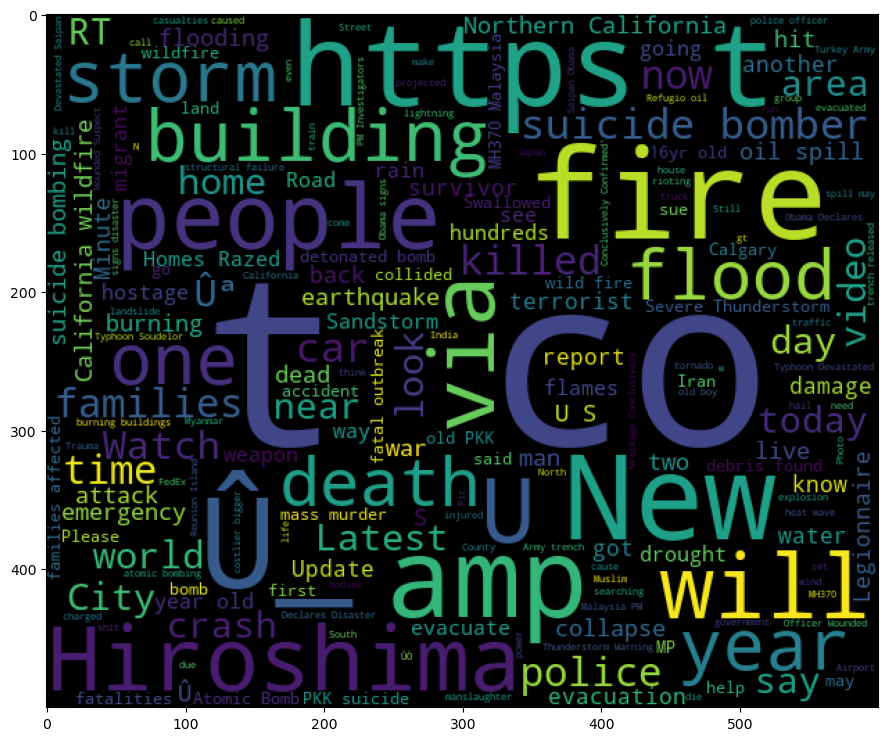

In [6]:
from wordcloud import WordCloud

word_1 = '  '.join(list(train_df[train_df['target']==1]['text']))
word_1 = WordCloud(width=600, height=500).generate(word_1)
plt.figure(figsize=(13, 9))
plt.imshow(word_1)
plt.show()

### Common words used in Non-Disaster Tweets

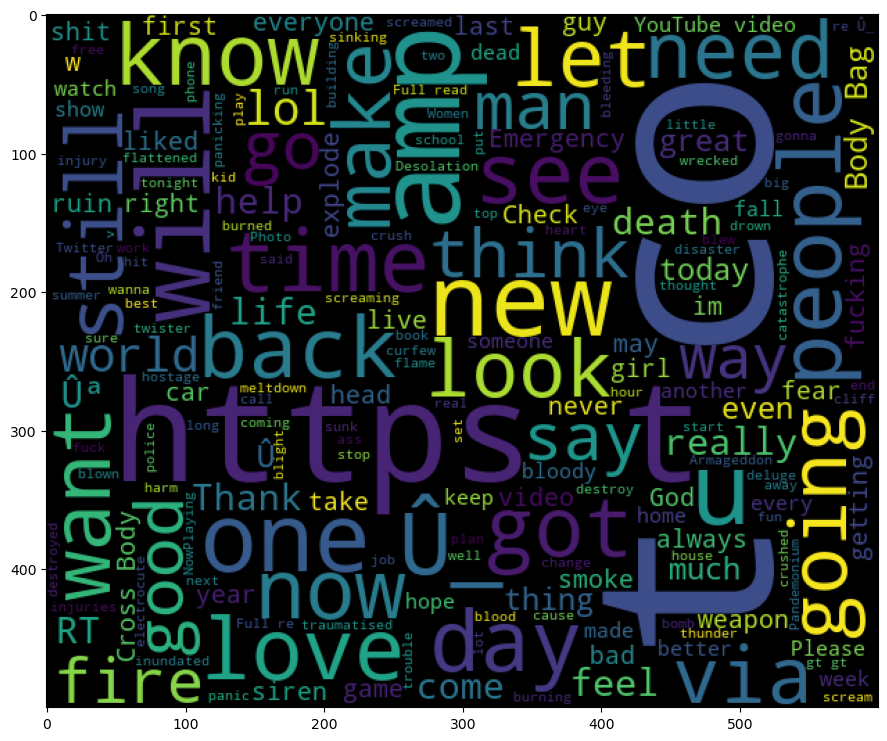

In [7]:
word_0 = '  '.join(list(train_df[train_df['target']==0]['text']))
word_0 = WordCloud(width=600, height=500).generate(word_0)
plt.figure(figsize=(13, 9))
plt.imshow(word_0)
plt.show()

## Feature Engineering

Drop unnessesary feature

In [8]:
train_df = train_df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)

Fill missing values

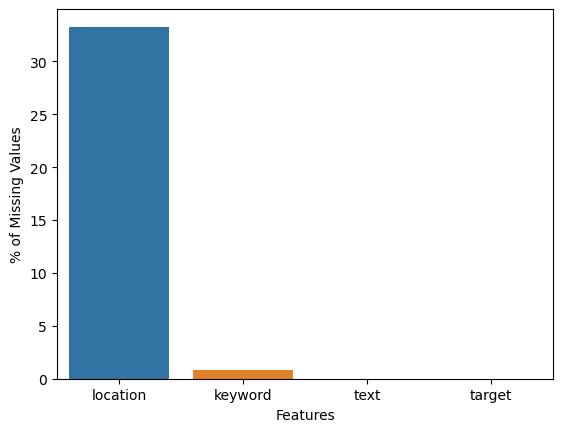

In [9]:
miss_per = (train_df.isnull().sum()/len(train_df))*100
miss_per = miss_per.sort_values(ascending=False)

sns.barplot(x=miss_per.index, y=miss_per)
plt.xlabel('Features')
plt.ylabel('% of Missing Values')
plt.show()

In [10]:
train_df['location'] = train_df['location'].fillna('None')
train_df['keyword'] = train_df['keyword'].fillna('None')
test_df['location'] = test_df['location'].fillna('None')
test_df['keyword'] = test_df['keyword'].fillna('None')

Tokenization

In [11]:
import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer()

train_df['tokens'] = [tokenizer.tokenize(item) for item in train_df.text]
test_df['tokens'] = [tokenizer.tokenize(item) for item in test_df.text]

Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_item(item):
    new_item = []
    for x in item:
        x = lemmatizer.lemmatize(x)
        new_item.append(x)
    return " ".join(new_item)

In [13]:
train_df['tokens'] = [lemmatize_item(item) for item in train_df.tokens]
test_df['tokens'] = [lemmatize_item(item) for item in test_df.tokens]

Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
target = train_df['target']
train_df = train_df.drop('target', axis=1)
train_x_vec = vectorizer.fit_transform(train_df.tokens)
test_x_vec = vectorizer.transform(test_df.tokens)

# Modeling

In [15]:
X = train_x_vec
y = target

Split train_df

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

Define SVC model

			Classification report:

               precision    recall  f1-score   support

           0       0.78      0.91      0.84      1338
           1       0.84      0.64      0.73       946

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284
 



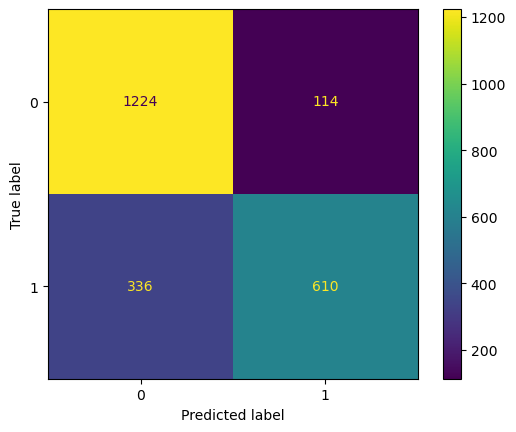

In [27]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.svm import SVC

class_svc = SVC(probability=True, random_state=0)
class_svc.fit(X_train, y_train)
y_pred_svc = class_svc.predict(X_valid)

class_rep_svc = classification_report(y_valid, y_pred_svc)
print('\t\t\tClassification report:\n\n', class_rep_svc, '\n')

plot_confusion_matrix(class_svc, X_valid, y_valid)
plt.show()

In [18]:
import numpy as np
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

In [19]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_valid, y_pred_svc)

0.5924259961339778

In [20]:
roc = roc_auc_score(y_valid, y_pred_svc)
print('ROC: %.3f' % roc)

ROC: 0.780


In [21]:
class_svc = SVC(probability=True, random_state=0)
class_svc.fit(X, y)
pred = class_svc.predict(test_x_vec)

In [22]:
actual_values = y_valid.tolist()

In [23]:
input_data = X_valid
predicted_values = class_svc.predict(input_data)

In [24]:
df = pd.DataFrame(columns=['Actual', 'Predicted'])
for actual, predicted in zip(actual_values, predicted_values):
    df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
print(df)

     Actual Predicted
0         0         0
1         0         0
2         0         0
3         0         0
4         0         0
...     ...       ...
2279      0         0
2280      0         0
2281      0         0
2282      0         1
2283      1         1

[2284 rows x 2 columns]


In [25]:
df.to_excel("D:\\SVC Results.xlsx", index=False)